# Erdos-Renyi model

1. Build three connectivity models in a single layer.
* Ring network (local neighbors connectivity)
* Watts-Strogatz model
* Random network
2. Research and implment how to measure the structure of the networks
* Average path length
* Average clustering coefficient

In [47]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Generación de funciones para el circuito de neuronas

In [48]:
def create_ring_network(N, k):
    G = nx.watts_strogatz_graph(N, k, 0)  # Watts-Strogatz con p=0 es un anillo puro
    return G

def create_small_world(N, k, p):
    G = nx.watts_strogatz_graph(N, k, p)  # Red de pequeño mundo
    return G

def create_erdos_renyi(N, p):
    G = nx.erdos_renyi_graph(N, p)  # Red aleatoria
    return G

def plot_graph(G, title):
    plt.figure(figsize=(6, 6))
    pos = nx.circular_layout(G)  # Para visualizarlo en forma de anillo
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.title(title)
    plt.show()

def compute_metrics(G):
    avg_path_length = nx.average_shortest_path_length(G) if nx.is_connected(G) else np.nan
    clustering_coeff = nx.average_clustering(G)
    return avg_path_length, clustering_coeff

## Parámetros de la red

In [49]:
# Parámetros
N = 20  # Número de nodos
k = 4   # Vecinos en la red en anillo y Watts-Strogatz
p_sw = 0.2  # Probabilidad de reconexión en pequeño mundo
p_er = 0.2  # Probabilidad de conexión en Erdős-Rényi

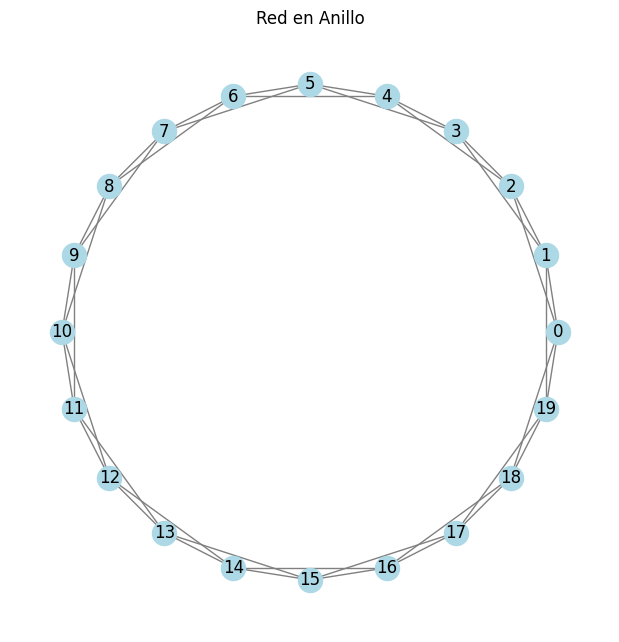

In [50]:
ring_net = create_ring_network(N, k)
plot_graph(ring_net, "Red en Anillo")

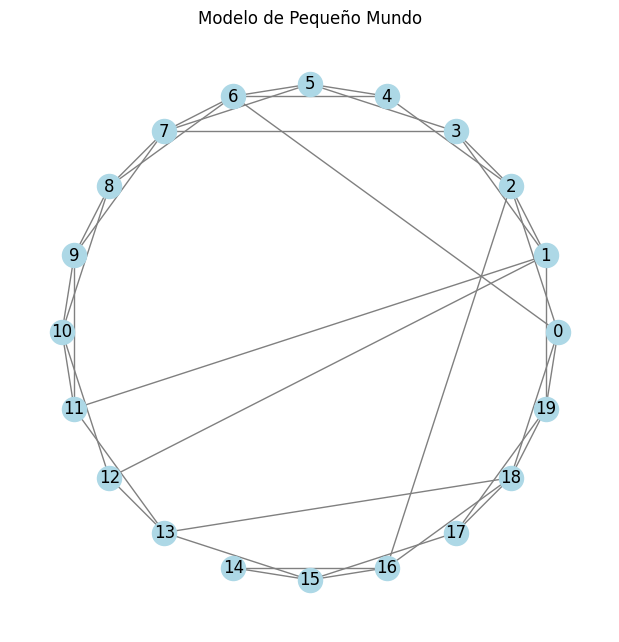

In [51]:
small_world_net = create_small_world(N, k, p_sw)
plot_graph(small_world_net, "Modelo de Pequeño Mundo")

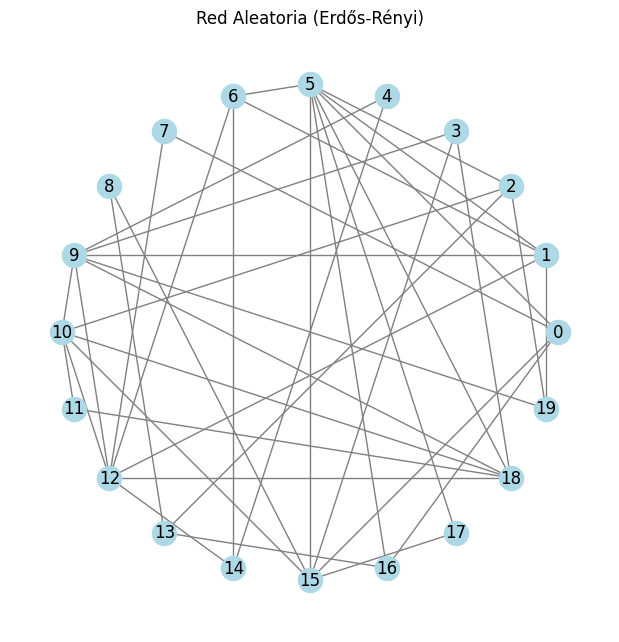

In [52]:
erdos_renyi_net = create_erdos_renyi(N, p_er)
plot_graph(erdos_renyi_net, "Red Aleatoria (Erdős-Rényi)")

In [53]:
metrics = {
    "Ring Network": compute_metrics(ring_net),
    "Small World": compute_metrics(small_world_net),
    "Erdős-Rényi": compute_metrics(erdos_renyi_net)
}

for model, (path_length, clustering) in metrics.items():
    print(f"{model}:\n  - Longitud de camino promedio: {path_length:.3f}\n  - Coeficiente de agrupamiento promedio: {clustering:.3f}\n")

Ring Network:
  - Longitud de camino promedio: 2.895
  - Coeficiente de agrupamiento promedio: 0.500

Small World:
  - Longitud de camino promedio: 2.337
  - Coeficiente de agrupamiento promedio: 0.297

Erdős-Rényi:
  - Longitud de camino promedio: 2.142
  - Coeficiente de agrupamiento promedio: 0.301

